# wealth.how.category == New Sectors 인 경우 상대적으로 나이(demographics.age)가 적을 것이다.

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# file load
file_path = './billionaires_cleansed.csv'
eda_df = pd.read_csv(file_path)

## category 별로 grouping
category_df = eda_df['demographics.age'].groupby(eda_df['wealth.how.category'])

In [151]:
## 데이터의 수가 적은 Trucking, Energy는 버림
category_df = category_df.describe()['Financial':'Traded Sectors']
category_df

,count,mean,std,min,25%,50%,75%,max
wealth.how.category,,,,,,,,
Financial,801.0,54.654182,25.447672,0.0,49.00,61.0,71.0,96.0
New Sectors,319.0,51.228840,21.229822,0.0,44.00,55.0,65.0,92.0
Non-Traded Sectors,597.0,52.520938,27.013512,0.0,47.00,60.0,71.0,96.0
Resource Related,245.0,55.530612,19.686583,0.0,49.00,57.0,65.0,98.0
Traded Sectors,564.0,52.423759,26.872032,0.0,45.75,60.0,71.0,95.0


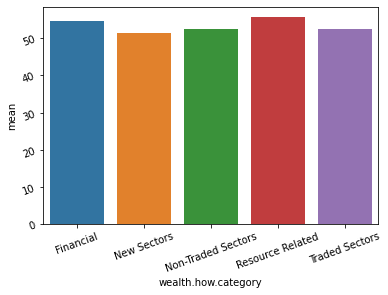

In [157]:
# 각 카테고리별 mean을 barplot 형태로 그림
plot = sns.barplot(x=category_df.index, y = category_df['mean'])
plot.tick_params(labelrotation=20)


##  *생각만큼 유의미한 차이를 보이지 않음

### next step: 경향성을 알아보기 위해 4분위 수를 비교

<Figure size 720x360 with 0 Axes>

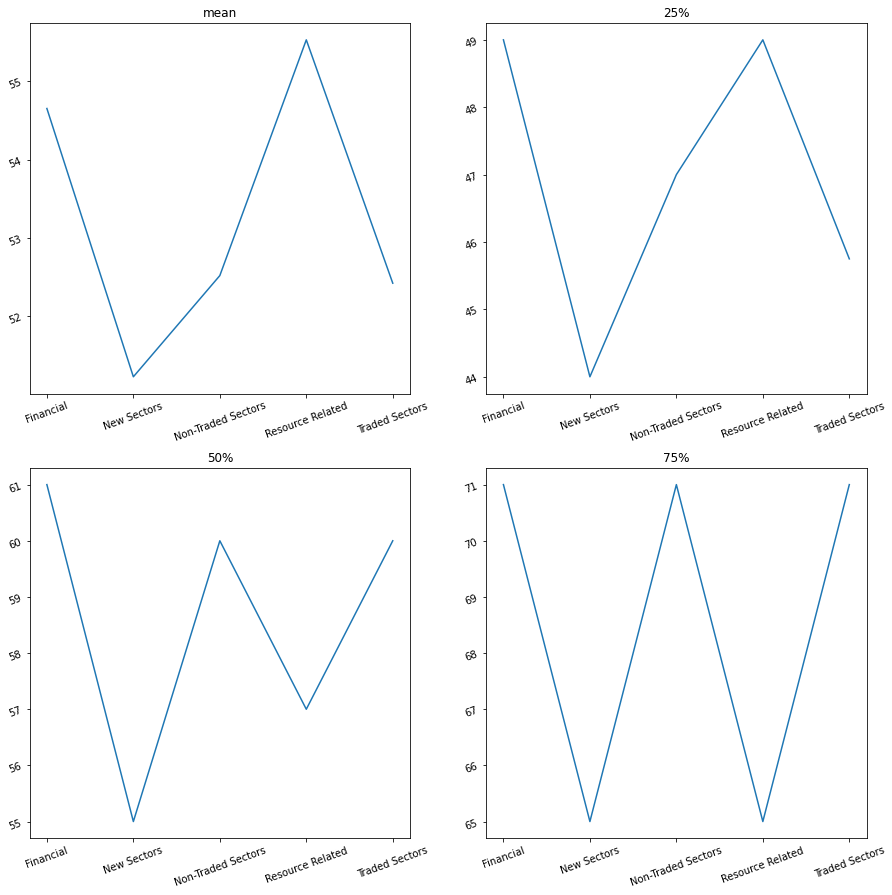

In [158]:
plt.figure(figsize=(10, 5))
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 2, 1, title = 'mean')
ax2 = fig.add_subplot(2, 2, 2, title ='25%')
ax3 = fig.add_subplot(2, 2, 3, title ='50%')
ax4 = fig.add_subplot(2, 2, 4, title = '75%')
ax1.tick_params(labelrotation=20)
ax2.tick_params(labelrotation=20)
ax3.tick_params(labelrotation=20)
ax4.tick_params(labelrotation=20)
ax1.plot(category_df.index, category_df['mean'])
ax2.plot(category_df.index, category_df['25%'])
ax3.plot(category_df.index, category_df['50%'])
ax4.plot(category_df.index, category_df['75%'])


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='demographics.age', ylabel='Density'>

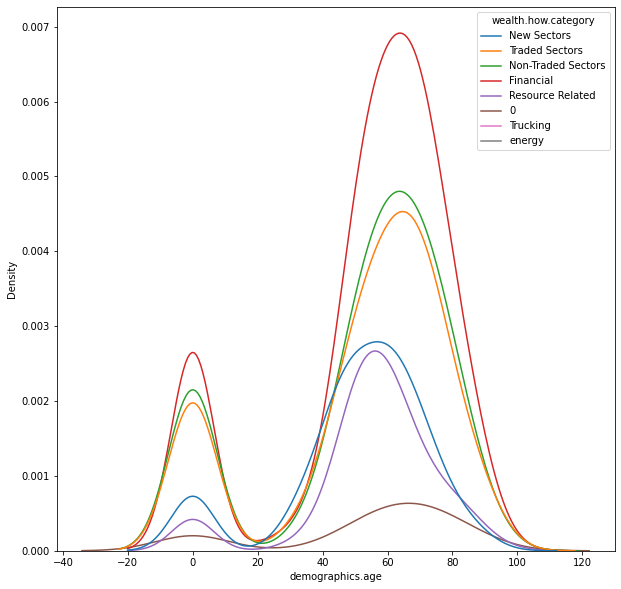

In [70]:
plt.figure(figsize=(10, 10))
sns.kdeplot(data=eda_df, x='demographics.age', hue='wealth.how.category')

## 결론 wealth.how.category 변수를 잘못파악하였지만, New Sectors category가 다를 category에 비해 조금은 더 어린 경향을 보이고 있다.

# 남성억만장자가 더 많을 것이다.

(180, 1473)

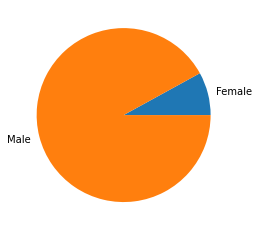

In [149]:
eda_df[eda_df['demographics.gender']=='male'].count()

cnt_gender = []


## 연도별 분리
one = eda_df[eda_df['year'] == 1996].groupby('demographics.gender')
two = eda_df[eda_df['year'] == 2001].groupby('demographics.gender')
three = eda_df[eda_df['year'] == 2014].groupby('demographics.gender')
label = ['Female', 'Male']
plt.plt.pie([one['rank'].count()['female'], one['rank'].count()['male']], labels= label)
two['rank'].count()['female'], two['rank'].count()['male']
three['rank'].count()['female'], three['rank'].count()['male']

In [123]:
two.describe()

rank                                                \
                     count        mean         std    min     25%    50%   
demographics.gender                                                        
female                38.0  263.026316  182.128628   10.0  109.00  261.5   
male                 498.0  259.060241  145.368485    1.0  132.00  251.0   
married couple         2.0  426.500000   89.802561  363.0  394.75  426.5   

                                     year          ...  location.gdp  \
                        75%    max  count    mean  ...           75%   
demographics.gender                                ...                 
female               452.00  490.0   38.0  2001.0  ...  1.060000e+13   
male                 387.00  490.0  498.0  2001.0  ...  1.060000e+13   
married couple       458.25  490.0    2.0  2001.0  ...  2.417500e+11   

                                  wealth.worth in billions            \
                              max                    count      mean   
demographics.gender                                                    
female               1.060000e+13                     38.0  4.505263   
male                 1.060000e+13                    498.0  3.122490   
married couple       2.790000e+11                      2.0  1.200000   

                                                            
                          std  min  25%   50%    75%   max  
demographics.gender                                         
female               5.452198  1.0  1.1  1.85  3.700  18.5  
male                 4.344406  1.0  1.3  1.90  3.275  58.7  
married couple       0.282843  1.0  1.1  1.20  1.300   1.4  

[3 rows x 48 columns]

In [124]:
three.describe()

rank                                             \
                      count        mean         std  min    25%    50%   
demographics.gender                                                      
female                180.0  801.761111  472.418458  9.0  408.0  764.0   
male                 1473.0  810.380855  463.014514  1.0  408.0  828.0   

                                       year          ... location.gdp       \
                        75%     max   count    mean  ...          75%  max   
demographics.gender                                  ...                     
female               1210.0  1565.0   180.0  2014.0  ...          0.0  0.0   
male                 1210.0  1565.0  1473.0  2014.0  ...          0.0  0.0   

                    wealth.worth in billions                                \
                                       count      mean       std  min  25%   
demographics.gender                                                          
female                                 180.0  3.920556  5.312604  1.0  1.4   
male                                  1473.0  3.902716  5.801227  1.0  1.4   

                                     
                     50%  75%   max  
demographics.gender                  
female               2.3  3.7  36.7  
male                 2.1  3.7  76.0  

[2 rows x 48 columns]